In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import os
from xml.etree import ElementTree
from matplotlib import pyplot as plt


C:\Users\Mustafa\AppData\Local\Temp\ipykernel_23400\2670434410.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
keras = tf.keras

In [3]:
class_names = ['person','person-like']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

n_classes = 2
size = (200,200)

In [4]:
def load_data():
    datasets = ['Train/Train', 'Test/Test', 'Val/Val']
    output = []

    for dataset in datasets:
        imags = []
        labels = []
        directoryA = "C:archive (1)/Test/Test/Annotations" + dataset +"/Annotations"
        directoryIMG = "C:archive (1)/Test/Test/Annotations" + dataset +"/JPEGImages/"
        file = os.listdir(directoryA)
        img = os.listdir(directoryIMG)
        file.sort()
        img.sort()

        i = 0
        for xml in file:

            xmlf = os.path.join(directoryA,xml)
            dom = ElementTree.parse(xmlf)
            vb = dom.findall('object')
            label = vb[0].find('name').text
            labels.append(class_names_label[label])

            img_path = directoryIMG + img[i]
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            imags.append(curr_img)
            i +=1
        
        imags = np.array(imags, dtype='float32')
        imags = imags / 255
        
      #  labels = pd.DataFrame(labels)
        labels = np.array(labels, dtype='int32')

        output.append((imags, labels))
    return output


        

In [5]:
(train_images, train_labels),(test_images, test_labels),(val_images, val_labels) = load_data()

In [6]:
train_images.shape

(944, 200, 200, 3)

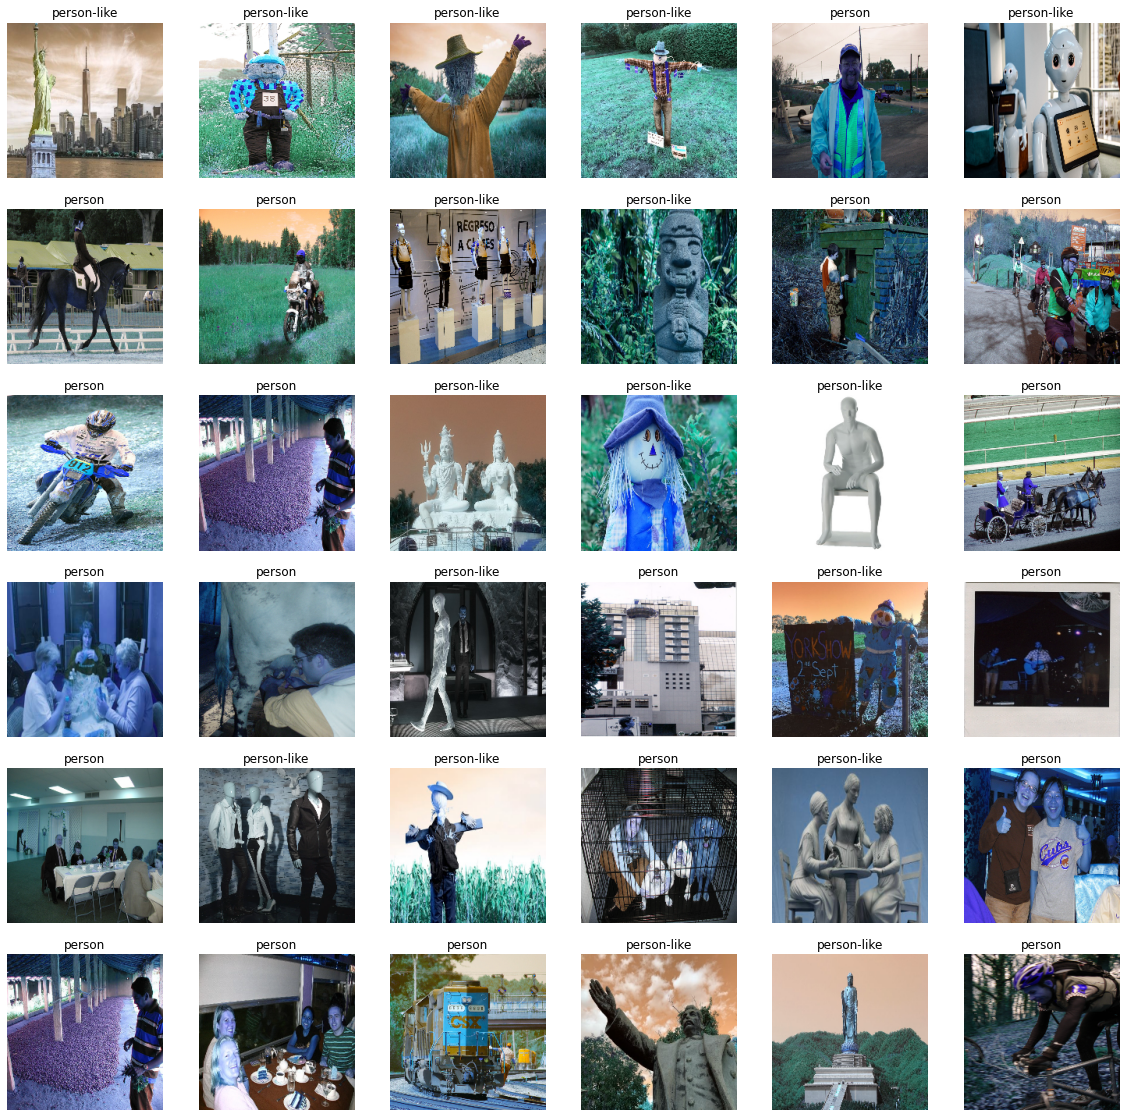

In [7]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(train_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])  
    plt.title(class_names[train_labels[i]])
    plt.axis('off')

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=6, 
                    validation_data=(test_images, test_labels))

Train on 944 samples, validate on 235 samples
Epoch 1/6
944/944 [==============================] - 24s 25ms/sample - loss: 1.1467 - accuracy: 0.5540 - val_loss: 0.6745 - val_accuracy: 0.5787
Epoch 2/6
944/944 [==============================] - 22s 24ms/sample - loss: 0.6683 - accuracy: 0.6229 - val_loss: 0.6483 - val_accuracy: 0.5915
Epoch 3/6
944/944 [==============================] - 23s 24ms/sample - loss: 0.5732 - accuracy: 0.6811 - val_loss: 0.6294 - val_accuracy: 0.6255
Epoch 4/6
944/944 [==============================] - 22s 24ms/sample - loss: 0.3827 - accuracy: 0.8252 - val_loss: 1.1124 - val_accuracy: 0.5915
Epoch 5/6
944/944 [==============================] - 22s 24ms/sample - loss: 0.2745 - accuracy: 0.9036 - val_loss: 0.7758 - val_accuracy: 0.6596
Epoch 6/6
944/944 [==============================] - 23s 24ms/sample - loss: 0.1074 - accuracy: 0.9640 - val_loss: 0.8657 - val_accuracy: 0.7021


In [12]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

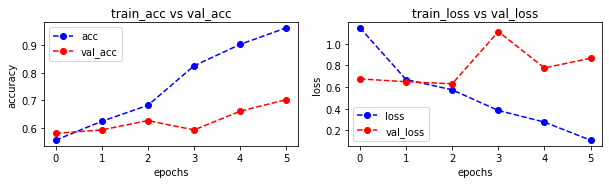

In [13]:
plot_accuracy_loss(history)

In [14]:
preds = model.predict(val_images) 

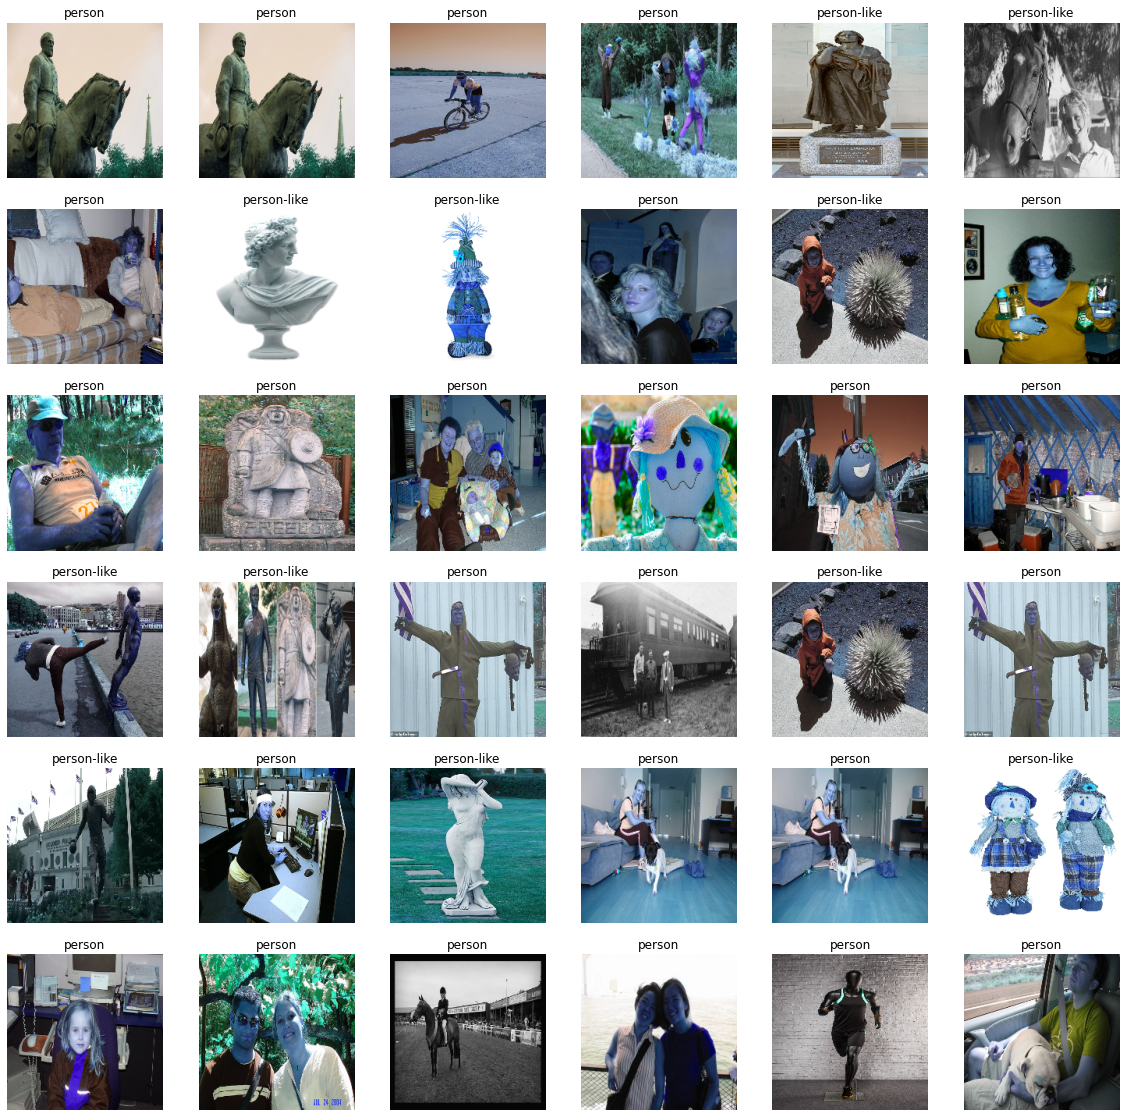

In [15]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(val_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i])    
    plt.axis('off')
    x =np.argmax(preds[i]) # takes the maximum of of the 6 probabilites. 
    plt.title((class_names[x]))

In [16]:
result = []
for i in range(len(preds)):
    result.append(np.argmax(preds[i]))

In [17]:
tn, fp, fn, tp = confusion_matrix(val_labels,result).ravel()

In [18]:
(tn, fp, fn, tp)

(61, 24, 28, 47)